### Loading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_excel(r'Data Analysis Exercise.xlsx', 'Data')
df

,Account ID,Last Year Growth Indicator,Profitability,Historical Revenue,Last year Revenue,Total open opportunities_USD,Service1OrderCountlastyear,Service2OrderCountlastyear,Service3OrderCountlastyear,Service4OrderCountlastyear,Service5OrderCountlastyear,WeeklyOrderCountlastyear,Monthly OrderCountlastyear,QuarterlyOrderCountlastyear,Account Class
0,395,LOST,72.04,200.3990,NaN,NaN,5.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,0
1,405,LOST,94.21,3605.6160,NaN,NaN,66.0,0.0,7.0,0.0,0.0,NaN,NaN,NaN,C
2,428,Decreased,75.61,32098.6992,NaN,NaN,371.0,0.0,38.0,0.0,0.0,20.0,8.0,3.0,C
3,440,NaN,NaN,0.0000,NaN,NaN,6.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0
4,442,LOST,-12.76,103372.5161,NaN,NaN,921.0,1.0,47.0,0.0,0.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,18040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
95,18049,NaN,NaN,0.0000,NaN,NaN,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0
96,18055,LOST,81.35,13795.0311,NaN,224000.0,85.0,2.0,7.0,0.0,0.0,NaN,NaN,NaN,B
97,18071,Decreased,77.03,14601.8032,NaN,NaN,27.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,C


In [3]:
df.shape

(99, 15)

### Exploratory Data Analysis (EDA)

In [4]:
df.head(10)

,Account ID,Last Year Growth Indicator,Profitability,Historical Revenue,Last year Revenue,Total open opportunities_USD,Service1OrderCountlastyear,Service2OrderCountlastyear,Service3OrderCountlastyear,Service4OrderCountlastyear,Service5OrderCountlastyear,WeeklyOrderCountlastyear,Monthly OrderCountlastyear,QuarterlyOrderCountlastyear,Account Class
0,395,LOST,72.04,2.003990e+02,NaN,NaN,5.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,0
1,405,LOST,94.21,3.605616e+03,NaN,NaN,66.0,0.0,7.0,0.0,0.0,NaN,NaN,NaN,C
2,428,Decreased,75.61,3.209870e+04,NaN,NaN,371.0,0.0,38.0,0.0,0.0,20.0,8.0,3.0,C
3,440,NaN,NaN,0.000000e+00,NaN,NaN,6.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0
4,442,LOST,-12.76,1.033725e+05,NaN,NaN,921.0,1.0,47.0,0.0,0.0,NaN,NaN,NaN,0
5,454,Decreased,62.53,2.007704e+05,120.890,NaN,432.0,1.0,35.0,0.0,0.0,24.0,10.0,4.0,C
6,487,Increased,46.10,3.606546e+05,1169.502,3000.0,2279.0,20.0,8.0,0.0,0.0,53.0,12.0,4.0,A
7,499,LOST,33.59,1.600000e+02,NaN,7560.0,50.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0
8,520,Decreased,56.16,1.690395e+06,1967.470,408000.0,7248.0,33.0,23.0,0.0,0.0,49.0,12.0,4.0,A
9,524,NaN,NaN,0.000000e+00,NaN,NaN,118.0,1.0,30.0,0.0,0.0,NaN,NaN,NaN,C


In [5]:
df.info() # we have 2 columns 'Object type'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Account ID                    99 non-null     int64  
 1   Last Year Growth Indicator    79 non-null     object 
 2   Profitability                 79 non-null     float64
 3   Historical Revenue            91 non-null     float64
 4   Last year Revenue             20 non-null     float64
 5   Total open opportunities_USD  27 non-null     float64
 6   Service1OrderCountlastyear    91 non-null     float64
 7   Service2OrderCountlastyear    91 non-null     float64
 8   Service3OrderCountlastyear    91 non-null     float64
 9   Service4OrderCountlastyear    91 non-null     float64
 10  Service5OrderCountlastyear    91 non-null     float64
 11  WeeklyOrderCountlastyear      32 non-null     float64
 12  Monthly OrderCountlastyear    32 non-null     float64
 13  Quarter

In [6]:
#Explore numeric features' statistics
#Discarding Account ID as it's statistical data dosn't make sense
df.drop(columns='Account ID').describe()

,Profitability,Historical Revenue,Last year Revenue,Total open opportunities_USD,Service1OrderCountlastyear,Service2OrderCountlastyear,Service3OrderCountlastyear,Service4OrderCountlastyear,Service5OrderCountlastyear,WeeklyOrderCountlastyear,Monthly OrderCountlastyear,QuarterlyOrderCountlastyear
count,79.000000,9.100000e+01,20.000000,27.000000,91.000000,91.000000,91.000000,91.000000,91.0,32.000000,32.000000,32.000000
mean,32.172025,9.826555e+04,6617.200665,60839.858519,562.879121,3.054945,19.780220,0.076923,0.0,21.468750,7.250000,2.937500
std,170.097355,2.597567e+05,11757.568498,140664.630377,1459.870396,11.558895,39.855517,0.733799,0.0,19.999975,4.414054,1.189673
min,-999.990000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,1.000000
25%,49.605000,2.295250e+02,268.905000,0.000000,5.500000,0.000000,0.000000,0.000000,0.0,4.000000,3.000000,2.000000
50%,63.090000,3.605616e+03,1848.035000,100.000000,27.000000,0.000000,1.000000,0.000000,0.0,17.500000,8.000000,3.000000
75%,76.245000,4.576457e+04,5897.706175,5580.000000,198.000000,1.000000,16.000000,0.000000,0.0,41.000000,12.000000,4.000000
max,100.000000,1.690395e+06,48241.040500,549000.100000,8179.000000,100.000000,178.000000,7.000000,0.0,53.000000,12.000000,4.000000


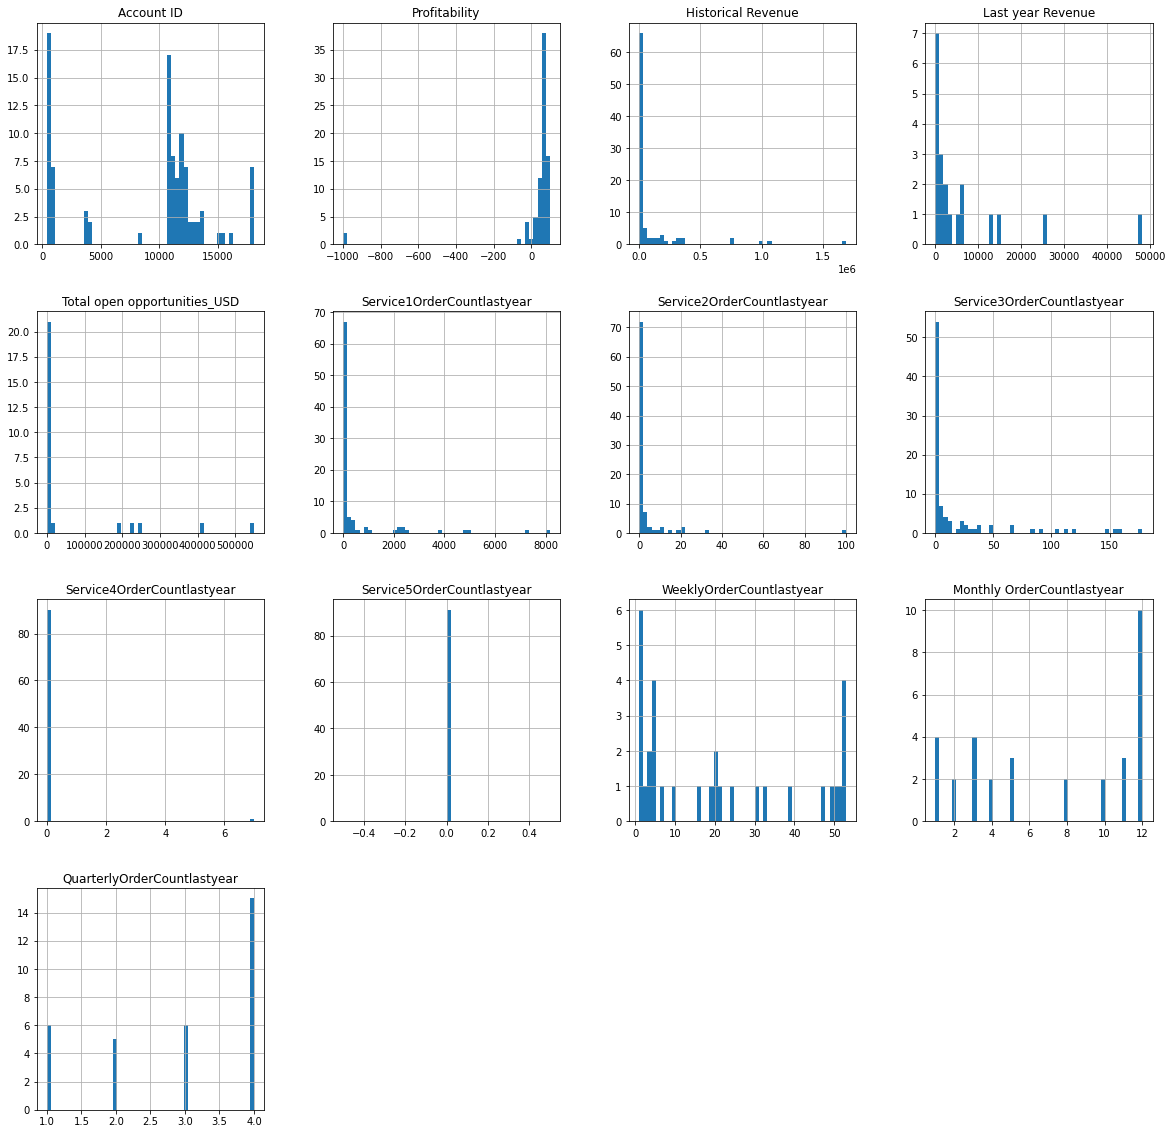

In [7]:
#Figure show distribution of values for each numerical column
df.hist(bins=50, figsize=(20,20))
plt.show()

#Preprocessing Data

## 1- Check & Remove Nulls

In [8]:
# check number of nulls at each column
df.isnull().sum() 

Account ID                       0
Last Year Growth Indicator      20
Profitability                   20
Historical Revenue               8
Last year Revenue               79
Total open opportunities_USD    72
Service1OrderCountlastyear       8
Service2OrderCountlastyear       8
Service3OrderCountlastyear       8
Service4OrderCountlastyear       8
Service5OrderCountlastyear       8
WeeklyOrderCountlastyear        67
Monthly OrderCountlastyear      67
QuarterlyOrderCountlastyear     67
Account Class                    0
dtype: int64

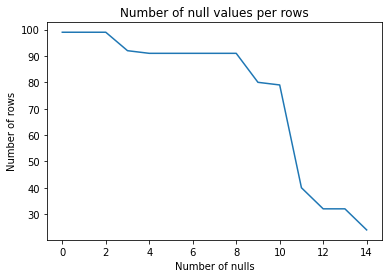

In [9]:
n = [df.dropna(thresh=i).shape[0] for i in range(15)]
plt.plot(n)
plt.xlabel('Number of nulls')
plt.ylabel('Number of rows')
plt.title('Number of null values per rows');

In [10]:
## show rows with null values more than 8 null value
df[df.isnull().sum(axis=1)>8] 

,Account ID,Last Year Growth Indicator,Profitability,Historical Revenue,Last year Revenue,Total open opportunities_USD,Service1OrderCountlastyear,Service2OrderCountlastyear,Service3OrderCountlastyear,Service4OrderCountlastyear,Service5OrderCountlastyear,WeeklyOrderCountlastyear,Monthly OrderCountlastyear,QuarterlyOrderCountlastyear,Account Class
11,542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
18,718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
20,768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
22,935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
24,999,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
34,10879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
46,10960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
94,18040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [11]:
# drop rows with null values more than 8 null value
df1 = df.dropna(thresh=8) 
df1

,Account ID,Last Year Growth Indicator,Profitability,Historical Revenue,Last year Revenue,Total open opportunities_USD,Service1OrderCountlastyear,Service2OrderCountlastyear,Service3OrderCountlastyear,Service4OrderCountlastyear,Service5OrderCountlastyear,WeeklyOrderCountlastyear,Monthly OrderCountlastyear,QuarterlyOrderCountlastyear,Account Class
0,395,LOST,72.04,200.3990,NaN,NaN,5.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,0
1,405,LOST,94.21,3605.6160,NaN,NaN,66.0,0.0,7.0,0.0,0.0,NaN,NaN,NaN,C
2,428,Decreased,75.61,32098.6992,NaN,NaN,371.0,0.0,38.0,0.0,0.0,20.0,8.0,3.0,C
3,440,NaN,NaN,0.0000,NaN,NaN,6.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0
4,442,LOST,-12.76,103372.5161,NaN,NaN,921.0,1.0,47.0,0.0,0.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,18025,LOST,-999.99,87.1940,NaN,NaN,24.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0
95,18049,NaN,NaN,0.0000,NaN,NaN,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0
96,18055,LOST,81.35,13795.0311,NaN,224000.0,85.0,2.0,7.0,0.0,0.0,NaN,NaN,NaN,B
97,18071,Decreased,77.03,14601.8032,NaN,NaN,27.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,C


## 2- Check Outlairs

In [12]:
# Checking Numerical Columns
num_cols=df.columns[(df.dtypes !='object').values].tolist()
num_cols.remove('Account ID')
num_cols

['Profitability',
 'Historical Revenue',
 'Last year Revenue',
 'Total open opportunities_USD',
 'Service1OrderCountlastyear',
 'Service2OrderCountlastyear',
 'Service3OrderCountlastyear',
 'Service4OrderCountlastyear',
 'Service5OrderCountlastyear',
 'WeeklyOrderCountlastyear',
 'Monthly OrderCountlastyear',
 'QuarterlyOrderCountlastyear']

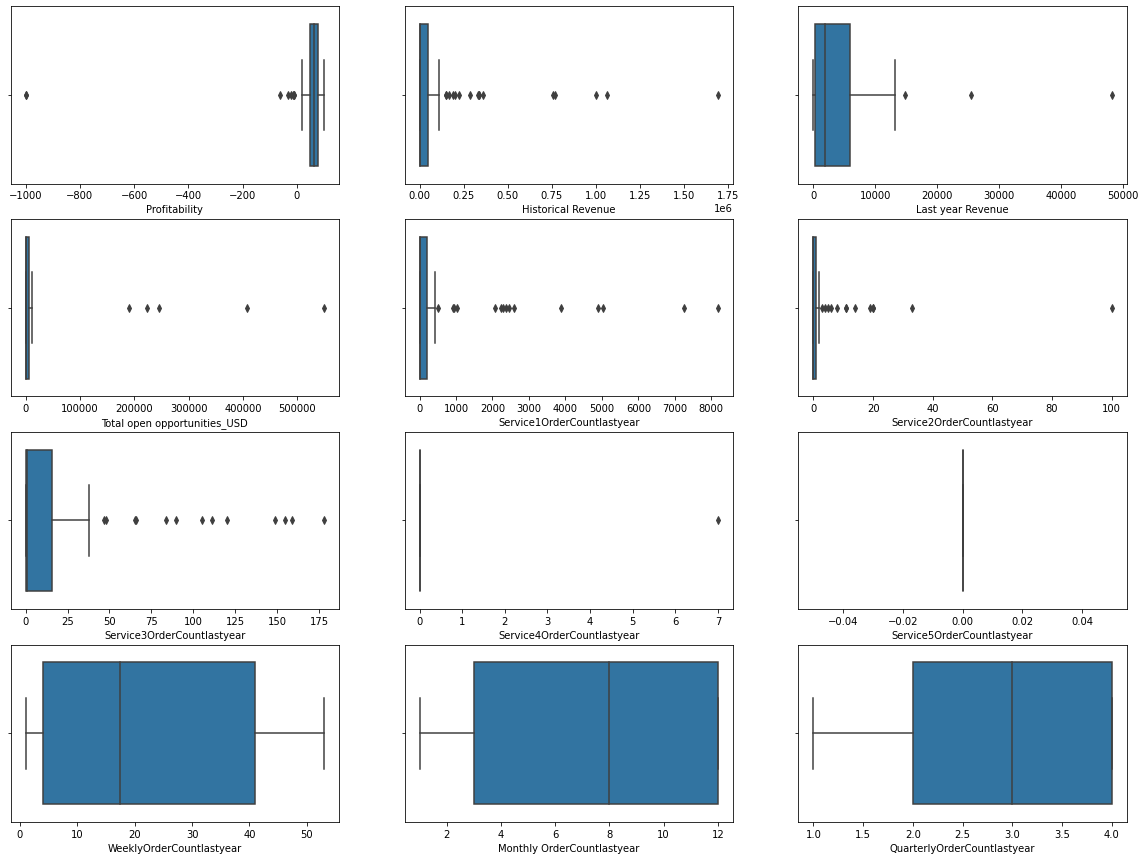

In [13]:
## Figure shows oulier values at each column
fig = plt.figure(figsize=(20,15))
for i, column in enumerate(num_cols):
    fig.add_subplot(4,3,i+1)
    sns.boxplot(data = df, x= column)    
plt.show()

In [14]:
## Remove outlair values <-200 
df=df[(df['Profitability'] < -200)==False]
df

,Account ID,Last Year Growth Indicator,Profitability,Historical Revenue,Last year Revenue,Total open opportunities_USD,Service1OrderCountlastyear,Service2OrderCountlastyear,Service3OrderCountlastyear,Service4OrderCountlastyear,Service5OrderCountlastyear,WeeklyOrderCountlastyear,Monthly OrderCountlastyear,QuarterlyOrderCountlastyear,Account Class
0,395,LOST,72.04,200.3990,NaN,NaN,5.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,0
1,405,LOST,94.21,3605.6160,NaN,NaN,66.0,0.0,7.0,0.0,0.0,NaN,NaN,NaN,C
2,428,Decreased,75.61,32098.6992,NaN,NaN,371.0,0.0,38.0,0.0,0.0,20.0,8.0,3.0,C
3,440,NaN,NaN,0.0000,NaN,NaN,6.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0
4,442,LOST,-12.76,103372.5161,NaN,NaN,921.0,1.0,47.0,0.0,0.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,18040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
95,18049,NaN,NaN,0.0000,NaN,NaN,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0
96,18055,LOST,81.35,13795.0311,NaN,224000.0,85.0,2.0,7.0,0.0,0.0,NaN,NaN,NaN,B
97,18071,Decreased,77.03,14601.8032,NaN,NaN,27.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,C


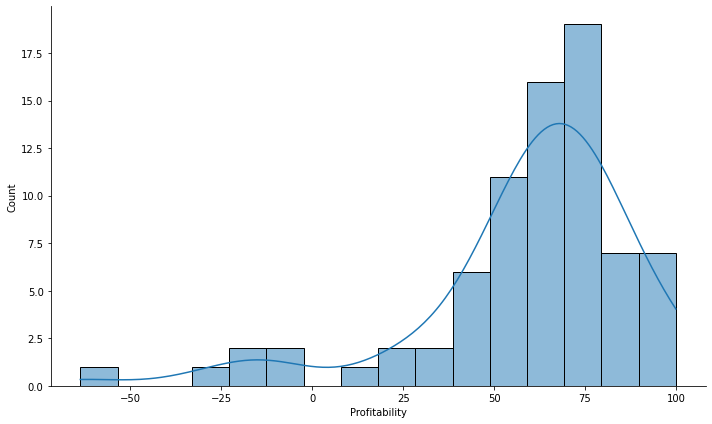

In [15]:
#Figure show 'Profitability' distribution after removing outlier values
sns.displot(df['Profitability'] , kde=True, height=6, aspect=10/6);

In [16]:
# Checking duplicates in 'Account ID' column
df.duplicated().sum()

0

In [17]:
# Checking Non-Numerical 'Categorical' Columns
cat_columns = df.columns[(df.dtypes =='object').values].tolist()
cat_columns

['Last Year Growth Indicator', 'Account Class']

In [18]:
# Checking values for each Categorical Columns
for i in df.columns[(df.dtypes =='object').values].tolist():
    print(i,'\n')
    print(df[i].value_counts())
    print('-----------------------------------------------')

Last Year Growth Indicator 

LOST         46
Increased    18
Decreased    13
Name: Last Year Growth Indicator, dtype: int64
-----------------------------------------------
Account Class 

0    42
C    29
B    17
A     9
Name: Account Class, dtype: int64
-----------------------------------------------


In [19]:
!pip install matplotlib --upgrade

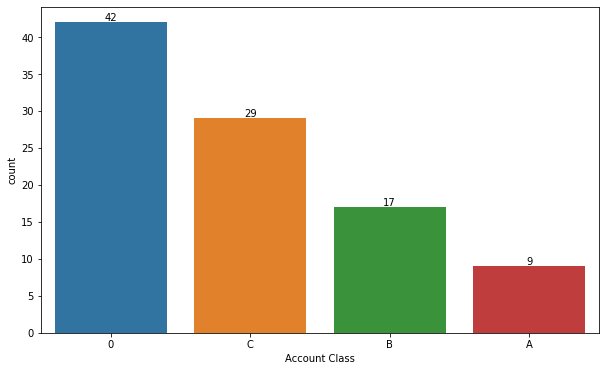

In [20]:
#figure shows number of accounts at each class
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x='Account Class', order = df['Account Class'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container)

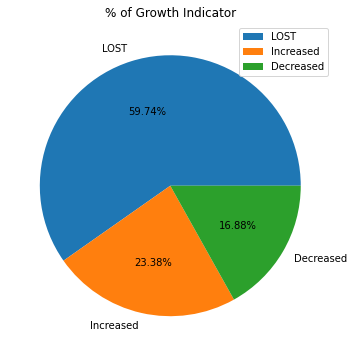

In [21]:
##Figure Shows % of each Growth Indicator
plt.figure(figsize = (6,6))
plt.pie(df['Last Year Growth Indicator'].value_counts(), labels=df['Last Year Growth Indicator'].value_counts().index, autopct='%1.2f%%')
plt.title('% of Growth Indicator')
plt.legend()
plt.show()

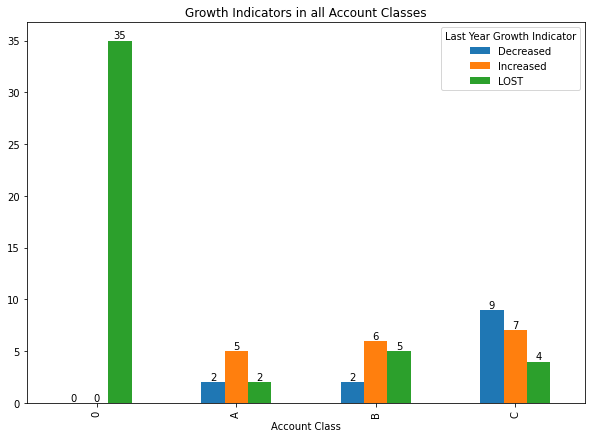

In [22]:
ax = (df[['Account Class', "Last Year Growth Indicator"]]
 .pivot_table(index='Account Class', columns='Last Year Growth Indicator', aggfunc=len, fill_value=0)
 .plot.bar(title='Growth Indicators in all Account Classes', figsize=(10, 7))
)

for container in ax.containers:
    ax.bar_label(container)


Figure shows that:

---



1.   Classes 'A' , 'B' have accounts with increasing indicator growth last year more than decreasing.

2.   Class 'C' has accounts with decreasing indicator growth last year more than increasing.
3.   Account class '0' doesn’t have any information about last year growth 'Lost'

In [23]:
#show data of account class A
df_A=df.query('`Account Class` == "A"')
df_A

,Account ID,Last Year Growth Indicator,Profitability,Historical Revenue,Last year Revenue,Total open opportunities_USD,Service1OrderCountlastyear,Service2OrderCountlastyear,Service3OrderCountlastyear,Service4OrderCountlastyear,Service5OrderCountlastyear,WeeklyOrderCountlastyear,Monthly OrderCountlastyear,QuarterlyOrderCountlastyear,Account Class
6,487,Increased,46.10,3.606546e+05,1169.5020,3000.0,2279.0,20.0,8.0,0.0,0.0,53.0,12.0,4.0,A
8,520,Decreased,56.16,1.690395e+06,1967.4700,408000.0,7248.0,33.0,23.0,0.0,0.0,49.0,12.0,4.0,A
14,590,Decreased,67.06,9.976687e+05,6018.5050,190000.0,5027.0,19.0,155.0,0.0,0.0,53.0,12.0,4.0,A
32,10869,LOST,82.91,1.913790e+05,NaN,0.0,3871.0,5.0,65.0,0.0,0.0,NaN,NaN,NaN,A
33,10870,Increased,65.76,1.061761e+06,NaN,0.0,4900.0,100.0,48.0,0.0,0.0,5.0,5.0,2.0,A
38,10888,LOST,55.10,1.133543e+04,NaN,NaN,336.0,20.0,120.0,0.0,0.0,NaN,NaN,NaN,A
39,10890,Increased,62.21,7.701336e+05,25536.9799,0.0,8179.0,14.0,90.0,0.0,0.0,53.0,12.0,4.0,A
50,11164,Increased,68.77,6.826500e+02,682.6500,NaN,27.0,0.0,0.0,0.0,0.0,5.0,3.0,1.0,A
78,12334,Increased,18.06,3.322904e+05,48241.0405,0.0,2591.0,11.0,66.0,7.0,0.0,51.0,12.0,4.0,A


In [24]:
#show data of account class B
df_B=df.query('`Account Class` == "B"')
df_B

,Account ID,Last Year Growth Indicator,Profitability,Historical Revenue,Last year Revenue,Total open opportunities_USD,Service1OrderCountlastyear,Service2OrderCountlastyear,Service3OrderCountlastyear,Service4OrderCountlastyear,Service5OrderCountlastyear,WeeklyOrderCountlastyear,Monthly OrderCountlastyear,QuarterlyOrderCountlastyear,Account Class
11,542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
13,586,Increased,49.47,23273.6632,NaN,NaN,117.0,0.0,4.0,0.0,0.0,16.0,8.0,3.0,B
25,1013,Increased,63.09,28897.4654,14800.796,0.0,97.0,0.0,28.0,0.0,0.0,20.0,11.0,4.0,B
26,3604,NaN,NaN,0.0000,NaN,NaN,34.0,0.0,3.0,0.0,0.0,NaN,NaN,NaN,B
34,10879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
35,10880,LOST,24.55,229.0500,NaN,0.0,11.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,B
36,10881,NaN,NaN,0.0000,NaN,NaN,2.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,B
37,10885,Decreased,61.10,757898.2495,123.810,11175.0,2379.0,11.0,178.0,0.0,0.0,50.0,12.0,4.0,B
42,10912,LOST,74.84,108064.1908,NaN,NaN,326.0,0.0,36.0,0.0,0.0,NaN,NaN,NaN,B
63,11751,Increased,62.09,339504.6049,13227.780,549000.1,2236.0,0.0,159.0,0.0,0.0,47.0,12.0,4.0,B


In [25]:
#show data of account class C
df_C=df.query('`Account Class` == "C"')
df_C

,Account ID,Last Year Growth Indicator,Profitability,Historical Revenue,Last year Revenue,Total open opportunities_USD,Service1OrderCountlastyear,Service2OrderCountlastyear,Service3OrderCountlastyear,Service4OrderCountlastyear,Service5OrderCountlastyear,WeeklyOrderCountlastyear,Monthly OrderCountlastyear,QuarterlyOrderCountlastyear,Account Class
1,405,LOST,94.21,3605.6160,NaN,NaN,66.0,0.0,7.0,0.0,0.0,NaN,NaN,NaN,C
2,428,Decreased,75.61,32098.6992,NaN,NaN,371.0,0.0,38.0,0.0,0.0,20.0,8.0,3.0,C
5,454,Decreased,62.53,200770.4023,120.8900,NaN,432.0,1.0,35.0,0.0,0.0,24.0,10.0,4.0,C
9,524,NaN,NaN,0.0000,NaN,NaN,118.0,1.0,30.0,0.0,0.0,NaN,NaN,NaN,C
12,580,NaN,NaN,0.0000,NaN,NaN,119.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,C
15,598,Decreased,71.64,335986.4194,NaN,NaN,934.0,1.0,8.0,0.0,0.0,33.0,12.0,4.0,C
17,712,Increased,81.82,4851.7672,NaN,NaN,8.0,0.0,6.0,0.0,0.0,5.0,4.0,2.0,C
18,718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
20,768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
22,935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C


In [26]:
#show data of account class 0
df_0=df.query('`Account Class` == 0')
df_0

,Account ID,Last Year Growth Indicator,Profitability,Historical Revenue,Last year Revenue,Total open opportunities_USD,Service1OrderCountlastyear,Service2OrderCountlastyear,Service3OrderCountlastyear,Service4OrderCountlastyear,Service5OrderCountlastyear,WeeklyOrderCountlastyear,Monthly OrderCountlastyear,QuarterlyOrderCountlastyear,Account Class
0,395,LOST,72.04,200.3990,NaN,NaN,5.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,0
3,440,NaN,NaN,0.0000,NaN,NaN,6.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0
4,442,LOST,-12.76,103372.5161,NaN,NaN,921.0,1.0,47.0,0.0,0.0,NaN,NaN,NaN,0
7,499,LOST,33.59,160.0000,NaN,7560.0,50.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0
10,534,LOST,71.40,16336.7400,NaN,NaN,8.0,4.0,28.0,0.0,0.0,NaN,NaN,NaN,0
16,666,LOST,62.98,349.0510,NaN,NaN,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,0
19,764,LOST,62.06,3240.9961,NaN,NaN,7.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,0
21,810,LOST,-11.44,340.2527,NaN,NaN,2.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0
24,999,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
27,3832,LOST,39.87,1000.6820,NaN,NaN,15.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,0


# Visualization

###Exploring dataset correlation

In [27]:
from scipy import stats
annova_corr =[]
for c in [i for i in df.columns if df[i].dtype != 'object' and i not in ['Account ID', ]]:
    df3 = df.dropna(axis=0, subset=[c])
    # .query('`Account Class` != 0')

    F, p = stats.f_oneway(df3[df3['Account Class']=='A'][c],
                        df3[df3['Account Class']=='B'][c],
                        df3[df3['Account Class']=='C'][c],
                        df3[df3['Account Class']==0][c]
                        )
    annova_corr.append((c, F))
    print(c, F)

Profitability 0.45483563886517936
Historical Revenue 22.03818717406447
Last year Revenue 1.3279131271379143
Total open opportunities_USD 1.5007023022725563
Service1OrderCountlastyear 36.95045946830988
Service2OrderCountlastyear 17.928073050925928
Service3OrderCountlastyear 5.87928129425859
Service4OrderCountlastyear 3.1835205992509374
Service5OrderCountlastyear nan
WeeklyOrderCountlastyear 5.433545762691266
Monthly OrderCountlastyear 3.137165053657252
QuarterlyOrderCountlastyear 1.8122316727420005


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3349: RuntimeWarning: invalid value encountered in double_scalars
  f = msb / msw


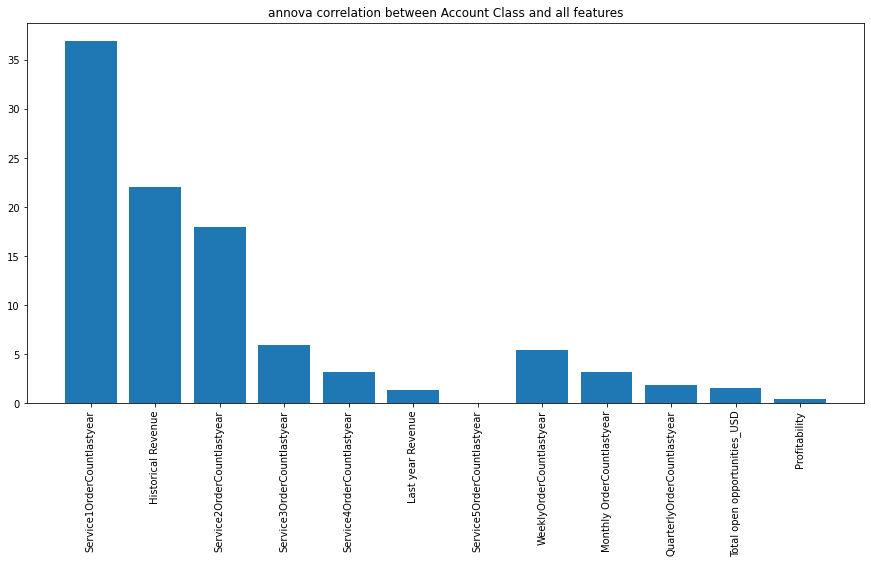

In [28]:
##Figure shows correlation between Account Class and all features
annova_corr.sort(key=lambda x: x[1] if x else 0, reverse=True)
plt.figure(figsize=(15,7))
plt.bar(range(len(annova_corr)), [val[1] for val in annova_corr], align='center')
plt.xticks(range(len(annova_corr)), [val[0] for val in annova_corr])
plt.xticks(rotation=90)
plt.title('annova correlation between Account Class and all features')
plt.show()

Figure shows that the most three features which affect account classification are:

---



1. 'Service1OrderCountlastyear'

2. 'Historical Revenue'
3. 'Service2OrderCountlastyear'






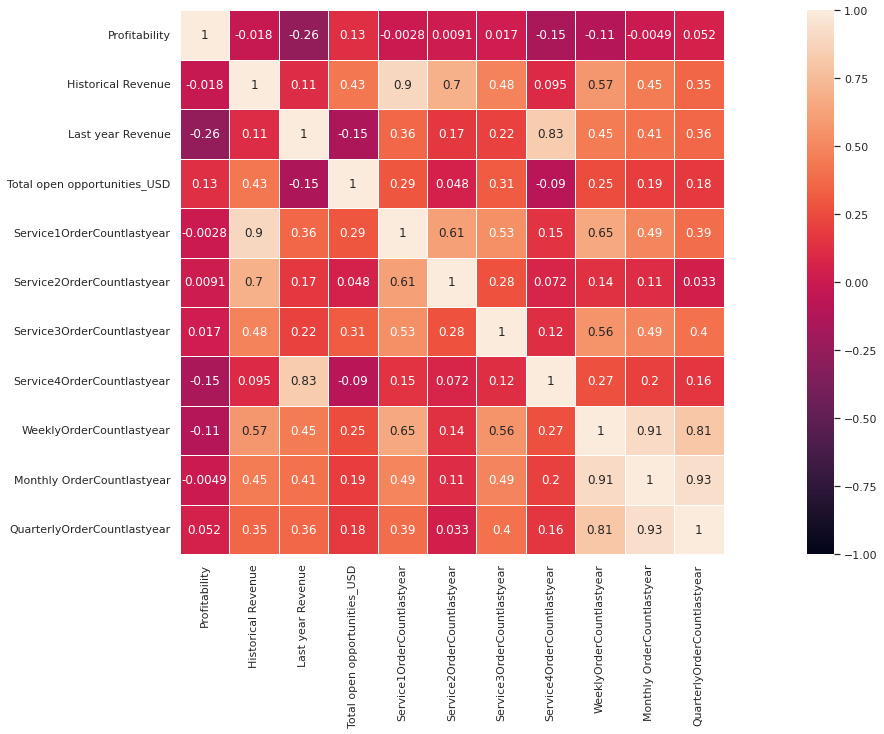

In [29]:
#Show Correlation between numerical features , 
import seaborn as sns; sns.set_theme()
import numpy as np

df2=df.drop(columns=['Account ID','Last Year Growth Indicator', 'Account Class','Service5OrderCountlastyear'])
corr = df2.corr()

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(30, 10))
    ax = sns.heatmap(corr, square=True, linewidths=.5, annot=True, vmin=-1, vmax=1)

Figure "heatmap" shows that :

---



*   high correlation between Historical Revenue , last year revenue and count of service 1,2,3 orders

*   high correlation between Historical Revenue , last year revenue and count of weekly,monthly,quarterly orders


In [30]:
df[['Historical Revenue','Last year Revenue', 'Account Class']].groupby('Account Class').sum()

,Historical Revenue,Last year Revenue
Account Class,,
0,6.272770e+05,0.0000
A,5.416301e+06,83616.1474
B,1.880597e+06,35379.7160
C,1.017744e+06,13348.1499


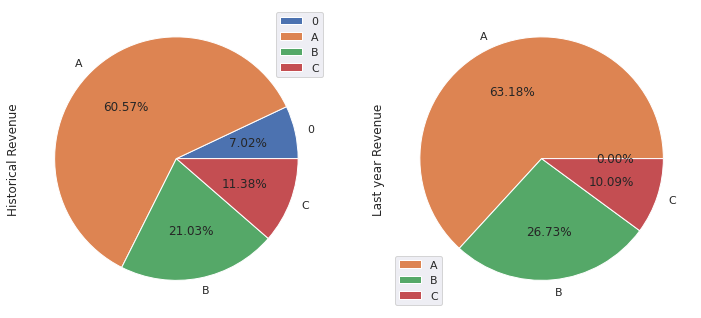

In [31]:
df_pie=df[['Historical Revenue','Last year Revenue','Account Class']].groupby('Account Class').sum()
df_pie.plot(kind='pie', subplots=True, figsize=(12,10), autopct='%1.2f%%');

### ***>> Class A contributed more to historical revenue and last year's revenue '>60%'***



In [32]:
df_prof=df[['Profitability', 'Account Class']].groupby('Account Class').mean()
df_prof

,Profitability
Account Class,
0,60.314000
A,58.014444
B,50.403846
C,62.660000


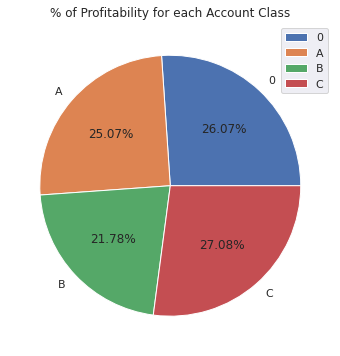

In [33]:
##Figure shows percentage of Profitability for each Account Class
plt.figure(figsize = (6,6))
plt.pie(df_prof['Profitability'], labels=df_prof.index, autopct='%1.2f%%')
plt.title('% of Profitability for each Account Class')
plt.legend()
plt.show()

##Profitability % values are close across all account classes despite differences in Historical Revenue and Last year's Revenue. The most value was in Class A.

In [34]:
df_total=df[['Total open opportunities_USD', 'Account Class']].groupby('Account Class').mean()
df_total

,Total open opportunities_USD
Account Class,
0,1876.666667
A,85857.142857
B,128712.137500
C,119.846667


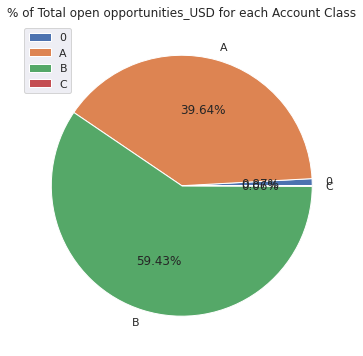

In [35]:
plt.figure(figsize = (6,6))
plt.pie(df_total['Total open opportunities_USD'], labels=df_total.index, autopct='%1.2f%%')
plt.title('% of Total open opportunities_USD for each Account Class')
plt.legend()
plt.show()

In [36]:
(df[['Service1OrderCountlastyear','Service2OrderCountlastyear','Service3OrderCountlastyear','Service4OrderCountlastyear','Service5OrderCountlastyear', 'Account Class']]
 .groupby('Account Class').sum())

,Service1OrderCountlastyear,Service2OrderCountlastyear,Service3OrderCountlastyear,Service4OrderCountlastyear,Service5OrderCountlastyear
Account Class,,,,,
0,4642.0,30.0,374.0,0.0,0.0
A,34458.0,222.0,575.0,7.0,0.0
B,8332.0,17.0,472.0,0.0,0.0
C,3755.0,9.0,378.0,0.0,0.0


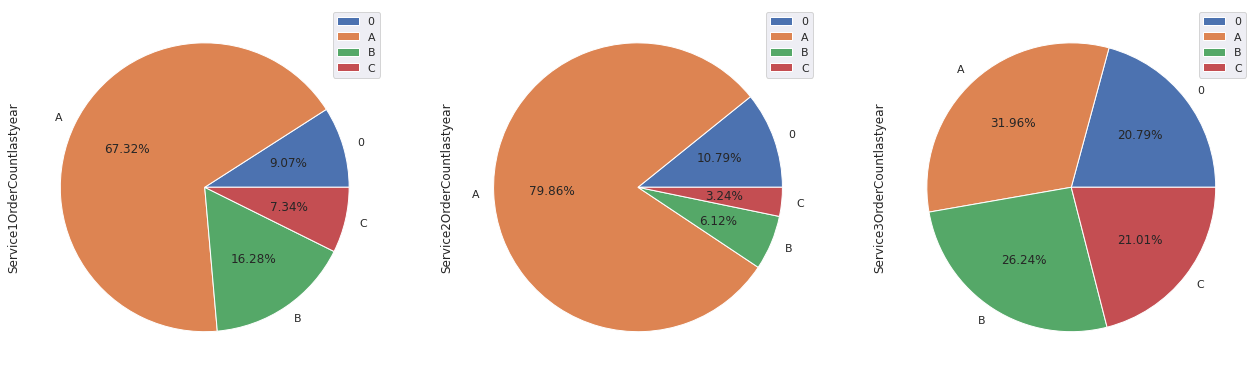

In [37]:
df_pie=df[['Service1OrderCountlastyear','Service2OrderCountlastyear','Service3OrderCountlastyear', 'Account Class']].groupby('Account Class').sum()
df_pie.plot(kind='pie', subplots=True, figsize=(22,10), autopct='%1.2f%%');

### ***>> Class A orders made up the majority of all services ordered last year***




## Class B has more open opportunities than Class A, although Class A contributed more to Historical Revenue and Last year's Revenue

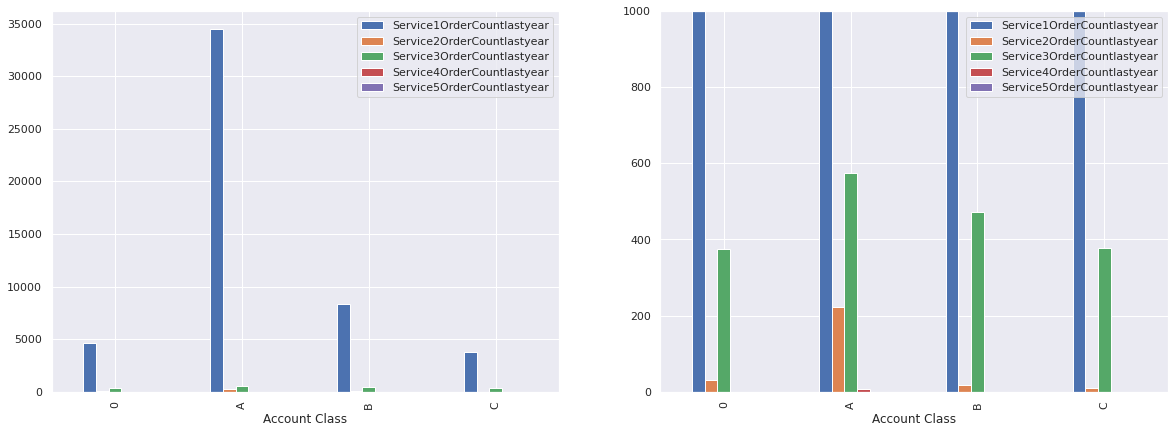

In [38]:
figure, axes = plt.subplots(1, 2,figsize=(20,7))
(df[['Service1OrderCountlastyear','Service2OrderCountlastyear','Service3OrderCountlastyear','Service4OrderCountlastyear','Service5OrderCountlastyear','Account Class']]
 .groupby('Account Class').sum().plot.bar(ax=axes[0]))
(df[['Service1OrderCountlastyear','Service2OrderCountlastyear','Service3OrderCountlastyear','Service4OrderCountlastyear','Service5OrderCountlastyear','Account Class']]
.groupby('Account Class').sum().plot.bar(ax=axes[1],ylim=(0,1000)));

## on the left hand side figure : Service1  is the most dominant service ordered across all account classes
## on the right hand sidefigure : Service 3 has been ordered more than service 2 across all account classes last year

In [39]:
df[['WeeklyOrderCountlastyear','Monthly OrderCountlastyear','QuarterlyOrderCountlastyear', 'Account Class']].groupby('Account Class').sum()

,WeeklyOrderCountlastyear,Monthly OrderCountlastyear,QuarterlyOrderCountlastyear
Account Class,,,
0,1.0,1.0,1.0
A,269.0,68.0,23.0
B,235.0,73.0,27.0
C,182.0,90.0,43.0


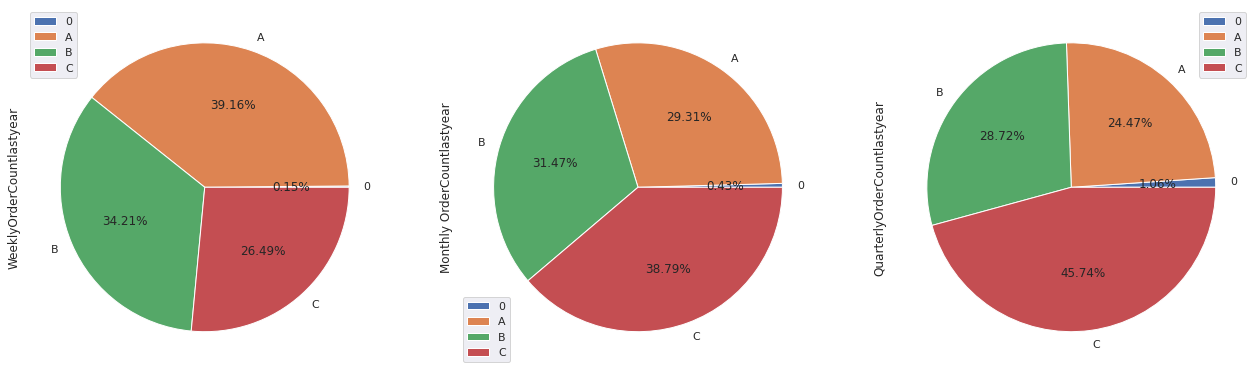

In [40]:
df_pie=df[['WeeklyOrderCountlastyear','Monthly OrderCountlastyear','QuarterlyOrderCountlastyear', 'Account Class']].groupby('Account Class').sum()
df_pie.plot(kind='pie', subplots=True, figsize=(22,10), autopct='%1.2f%%');

<AxesSubplot:xlabel='Account Class'>

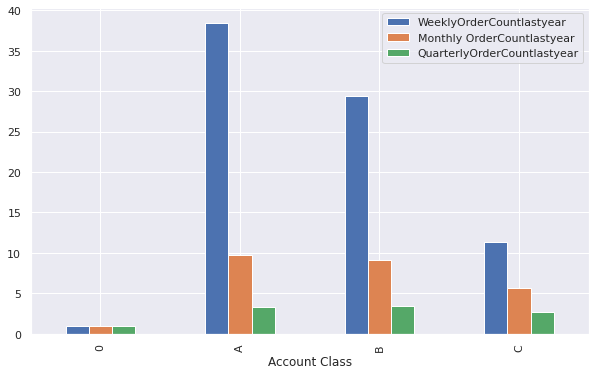

In [41]:
df[['WeeklyOrderCountlastyear','Monthly OrderCountlastyear','QuarterlyOrderCountlastyear','Account Class']].groupby('Account Class').mean().plot.bar(figsize=(10,6))



##1.   Class 0 has no data for weekly, monthly, or quarterly order counts last year
##2.   Classes A, B, C have the highest variance at weekly order counts and lower variance at monthly order counts and almost no variance at quarterly order counts last year

